In [31]:
from pathlib import Path
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

bqp_error=0.4
with Path("../../circuits/table.json").open() as f:
    table = json.load(f)
    circuits = [name for name, prob in table.items() if prob < bqp_error or prob > 1-bqp_error]
    # prob = prob of having 1
    # prob < $bqp_error$ => No instance
    # print(len(circuits))

bqp_error = 0.4
def find_correct_value(circuit_name):
    with Path("../../circuits/table.json").open() as f:
        table = json.load(f)
        # return 1 if yes instance
        # return 0 else (no instance, as circuits are already filtered)
        # print(table[circuit_name])
        return(int(table[circuit_name] > 1-bqp_error))


print(find_correct_value("circuit108.qasm"))

folder = "../../outcomes-n7-d10-c4-100"
files_dict = {}
for file in os.listdir(folder):
    file_path=os.path.join(folder, file)
    if "raw" not in file_path:
        prob = file.split(".json")[0].split("p")[1]
        files_dict[prob] = file_path
    

KeyError: 'circuit108.qasm'

In [92]:
def get_failure_rate(threshold:float):
    proportion_wrong_outcomes_dict = {}
    for prob in files_dict:
        file_path = files_dict[prob]
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        # Convert JSON data to DataFrame
        df = pd.DataFrame.from_dict(json_data, orient='index')
        df["expected_outcome"] = [find_correct_value(circuit) for circuit in df.index]

        proportion_wrong_outcomes = len(df[(df['outcome'] != df["expected_outcome"]) & (df['failure_rate'] < threshold)])/len(df)
            
        proportion_wrong_outcomes_dict[prob] = proportion_wrong_outcomes
    return proportion_wrong_outcomes_dict

get_failure_rate(threshold=0.08)

{'0.1': 0.32,
 '0.05': 0.46,
 '0.22': 0.06,
 '0.18': 0.13,
 '0.15': 0.23,
 '0.01': 0.4}

In [36]:
import json
import os
import pandas as pd

failure_rates_dict = {}
for prob in files_dict:
    file_path = files_dict[prob]
    with open(file_path, 'r') as file:
        json_data = json.load(file)

    # Convert JSON data to DataFrame
    df = pd.DataFrame.from_dict(json_data, orient='index')
    df["expected_outcome"] = [find_correct_value(circuit) for circuit in df.index]
    df[["outcome_sum",  "n_failed_trap_rounds", "failure_rate", "outcome",  "expected_outcome"]]
    if prob == "0.01":
        print(df)

    trap_round_failure_rate = df["failure_rate"].mean()
    failure_rates_dict[prob] = trap_round_failure_rate


threshold_values = [0.05, 0.07, 0.083, 0.1, 0.15]

                  outcome_sum  n_failed_trap_rounds outcome  failure_rate  \
circuit2412.qasm           51                     0       1          0.00   
circuit4647.qasm            0                     1       0          0.01   
circuit9419.qasm            0                     0       0          0.00   
circuit9811.qasm            0                     0       0          0.00   
circuit8760.qasm            0                     1       0          0.01   
...                       ...                   ...     ...           ...   
circuit4835.qasm           54                     0       1          0.00   
circuit6769.qasm            0                     0       0          0.00   
circuit7443.qasm           46                     1       0          0.01   
circuit0066.qasm            0                     0       0          0.00   
circuit9037.qasm           48                     1       0          0.01   

                  expected_outcome  
circuit2412.qasm                 0  
c

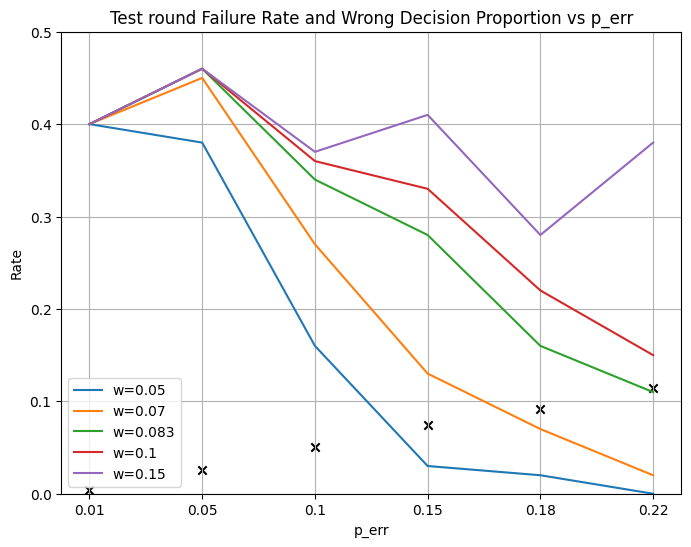

In [102]:
plt.figure(figsize=(8, 6))
p_values = sorted(list(files_dict.keys()))
trap_failure_rates = [failure_rates_dict[prob] for prob in p_values]

for t in threshold_values:
    proportion_wrong_outcomes_dict = get_failure_rate(t)
    comp_failure_rates = [proportion_wrong_outcomes_dict[prob] for prob in p_values]
    plt.plot(p_values, comp_failure_rates, label=f'w={t}')
# wrong_outcomes_rates = [proportion_wrong_outcomes_dict[prob] for prob in p_values]
plt.scatter(x=p_values, y=trap_failure_rates, color="black", marker="x")
# plt.scatter(x=p_values, y=wrong_outcomes_rates, color="red", marker="o")
plt.xlabel("p_err")
plt.ylabel("Rate")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Test round Failure Rate and Wrong Decision Proportion vs p_err")
plt.grid()
plt.show()


In [40]:
(1-2*0.4)/(2-2*0.4)

0.16666666666666663

In [30]:
import pandas as pd
import json
import os

# Loop through different parameter values
for w in [1, 2]:
    print(f"w=0.{w}")
    for p_err in [1, 2, 3, 4, 5, 6]:
        print(f"p=0.{p_err}")

        file_path = f"../../outcomes-n5-d40/w0.{w}-p0.{p_err}.json"
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                json_data = json.load(file)

            # Convert JSON data to DataFrame
            df = pd.DataFrame.from_dict(json_data, orient='index')
            print(df.head())
            # Ensure numeric columns are properly typed
            df['outcome'] = pd.to_numeric(df['outcome'], errors='coerce')
            df['failure_rate'] = pd.to_numeric(df['failure_rate'], errors='coerce')

            # Compute average trap failure rate
            average_failure_rate = df['failure_rate'].mean()

            # Compute proportion of '1's in 'outcome' when 'decision' is True
            proportion_ones = df[df['decision'] == True]['outcome'].mean()
            
            # print(f'Average Trap Failure Rate: {average_failure_rate}')
            # print(f'Proportion of wrong decisions: {proportion_ones}')
        else:
            print(f"File {file_path} does not exist, skipping...")


w=0.1
p=0.1
                 outcome_sum  n_failed_trap_rounds  decision outcome  \
circuit229.qasm           28                     4      True       0   
circuit451.qasm           36                     3      True       0   
circuit292.qasm           56                     3      True       1   
circuit977.qasm           48                     4      True       0   
circuit563.qasm           49                     4      True       0   

                 failure_rate  
circuit229.qasm          0.04  
circuit451.qasm          0.03  
circuit292.qasm          0.03  
circuit977.qasm          0.04  
circuit563.qasm          0.04  
p=0.2
                 outcome_sum  n_failed_trap_rounds  decision outcome  \
circuit820.qasm           61                     7      True       1   
circuit802.qasm           37                     8      True       0   
circuit769.qasm           27                    13     False       0   
circuit139.qasm           37                     9      True       0 

[np.float64(0.0479), np.float64(0.0993), np.float64(0.14955000000000002), np.float64(0.20039999999999997), np.float64(0.2508), np.float64(0.3012)]


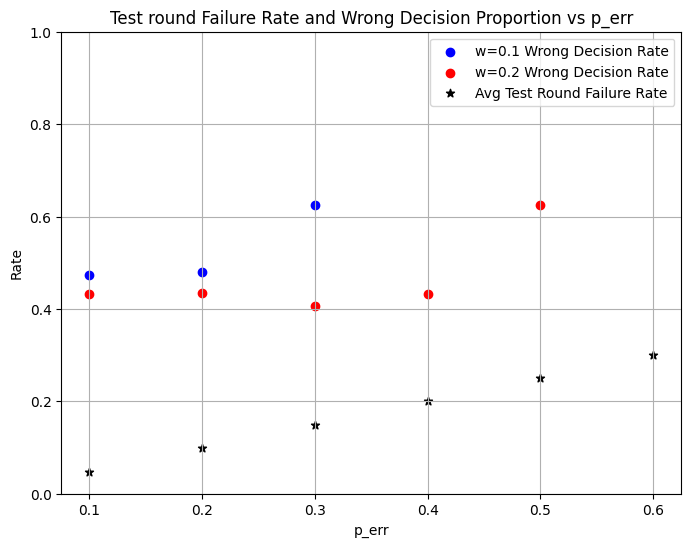


Summary Table:
 p_err   w  Avg Traps Failure Rate  Wrong Decision Proportion
   0.1 0.1                  0.0455                   0.473118
   0.2 0.1                  0.0966                   0.480000
   0.3 0.1                  0.1487                   0.625000
   0.4 0.1                  0.1999                        NaN
   0.5 0.1                  0.2454                        NaN
   0.6 0.1                  0.3048                        NaN
   0.1 0.2                  0.0503                   0.432990
   0.2 0.2                  0.1020                   0.434783
   0.3 0.2                  0.1504                   0.406593
   0.4 0.2                  0.2009                   0.432432
   0.5 0.2                  0.2562                   0.625000
   0.6 0.2                  0.2976                        NaN


In [4]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

# Store results for plotting and table generation
p_values = {1: [], 2: []}
avg_failure_rates = {1: [], 2: []}
proportion_ones = {1: [], 2: []}
table_data = []

# Loop through different parameter values
for w in [1, 2]:
    for p_err in [1, 2, 3, 4, 5, 6]:
        file_path = f"../../outcomes-n5-d40/w0.{w}-p0.{p_err}.json"
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                json_data = json.load(file)

            # Convert JSON data to DataFrame
            df = pd.DataFrame.from_dict(json_data, orient='index')

            # Ensure numeric columns are properly typed
            df['outcome'] = pd.to_numeric(df['outcome'], errors='coerce')
            df['failure_rate'] = pd.to_numeric(df['failure_rate'], errors='coerce')

            # Compute average trap failure rate
            average_failure_rate = df['failure_rate'].mean()

            # Compute proportion of '1's in 'outcome' when 'decision' is True
            proportion_one = df[df['decision'] == True]['outcome'].mean()
            
            # Store values for plotting and table
            p_values[w].append(p_err / 10)
            avg_failure_rates[w].append(average_failure_rate)
            proportion_ones[w].append(proportion_one)
            table_data.append([p_err / 10, w/10, average_failure_rate, proportion_one])
            
            # print(f"p=0.{p_err}")
            # print(f'Average Trap Failure Rate: {average_failure_rate}')
            # print(f'Proportion of wrong decisions: {proportion_one}')
        else:
            print(f"File {file_path} does not exist, skipping...")

from operator import add 
total_avg_failure_rates = list(map(add, avg_failure_rates[1], avg_failure_rates[2]))
total_avg_failure_rates[:] = [i/2 for i in total_avg_failure_rates]
print(total_avg_failure_rates)
# Plot results
plt.figure(figsize=(8, 6))
for w, color in zip([1, 2], ['blue', 'red']):
    # plt.scatter(p_values[w], avg_failure_rates[w], color=color, marker='*', label=f'w={w/10} Avg Failure Rate')
    plt.scatter(p_values[w], proportion_ones[w], color=color, marker='o', label=f'w={w/10} Wrong Decision Rate')

plt.scatter(p_values[1], total_avg_failure_rates, color="black", marker='*', label=f'Avg Test Round Failure Rate')

plt.xlabel("p_err")
plt.ylabel("Rate")
plt.ylim(0, 1)
plt.legend()
plt.title("Test round Failure Rate and Wrong Decision Proportion vs p_err")
plt.grid()
plt.show()

# Create and display table
table_df = pd.DataFrame(table_data, columns=["p_err", "w", "Avg Traps Failure Rate", "Wrong Decision Proportion"])
print("\nSummary Table:")
print(table_df.to_string(index=False))

Commentaires Harold:
- Test round failure rate
- Le JSON a les infos pertinentes si on garde la proportion de traps echoués 
  - On n'a que la simulation bruitée à faire,
  - et puis on accepte ou on rejette selon le threshold
- Factoriser la simulation "on chip" et "off chip".
  - On va pas faire des simulations différentes, peut-être juste pour le modèle de bruit
  - Laisser dans le protocole le RSP
  - ça met les deux sur le même pied
  - et les discussions sur les deux sont les mêmes, les interprétations sont différentes
  - On fait des simulations dans lesquelles on va, on va les présenter une seule fois, pour l'analyse du protocole dans lequel il y a une RSP qui est parfaite et sécure
  - le off-chip c'est une RSP où qqun prépare un qubit et l'envoie, et les trust assumptions = je m'assure que mon device chez moi produit bien les trucs, et que si ya du bruit alors c bruit indép. du secret
  - Alors le on-chip off-chip on s'en fout de la différence: le noise est secret-independent
  - Dans les deux cas on a montré qu'on a du bruit indépendant du secret.
  - Toute la partie que Cica a ajouté
- Dans le papier:
  1. sur la vérification, on a un protocole template principal fondamental, il fait la vérif :) et àpd ça on va faire un protocole pour benchmark et un protocole pour characterization. Mais dans un premier temps on présente ce protocole, rVBQC.
  2. Pas un protocole pour off-chip, on-chip, mais juste présenter le protocole dans lequel il y a un truc qui s'appelle RSP. On fait les bornes pour ce protocole, les simulations, etc.
     1. analyse theorique
     2. silmulation
  3. Ensuite on se demande comment implémenter ce RSP: 
     1. off-chip (préparation locale + envoi canal quantique ; usuel) 
     2. ou on-chip (envoie de l'instruction chiffrée de manière sécurisée à un ordinateur quantique, et qui l'envoie ensuite dans un canal)
  4. Qu'est-ce que cette différence implique au niveau sécurité ? on regarde dans les cas
     1. off-chip : on prépare localement l'état, puis quantum channel: on fait le calcul puis une CPTP => c'est une trust assumption. faut s'assurer que le device ne fait pas nptq du côté client.
     2. on-chip : Si cette RSP est implémentée chez le serveur, grosso modo on est amené à faire la même trust assumption en fait.